# Data exploration with pandas and sklearn

## The goal of this homework is to discover structure in an unlabeled dataset. The observations in this dataset belong to several different clusters. The specific goal is to identify how many clusters there are and to which cluster each point belongs.

## Question 1 (5 points). Load the dataset into a pandas dataframe. Each row represents a single observation; the values in the columns are numeric features recorded for that observation (in other words, this is a 'tidy' dataset). How many rows and columns are there? What is the dimension of this dataset? In other words, how many different features are there for each observation?

In [15]:
#load necessary packages
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
import pandas as pd # pandas

datafile = 'data/dataset.csv'

df = pd.read_csv(datafile) # df for dataframe
print('df has', df.shape[0],'rows and', df.shape[1],'columns (a.k.a. features per observation)')


df has 496 rows and 10 columns (a.k.a. features per observation)


## Question 2 (5 points). Make a scatter plot of `dim1` versus `dim2`, ie the first column versus the second one. How many clusters do you see in this plot?

I saw three clusters! :)


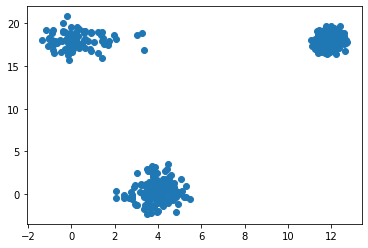

In [62]:

plt.scatter(df['dim1'], df['dim2'])
print('I saw three clusters! :)')



## Question 3 (15 points). Perform principal components analysis (PCA) on the dataset, following along with the example in the lectures10and11 notebook. What fraction of the variation in the dataset is captured by the first two components? Make a plot of the first component against the second component. Now how many clusters do you see in the data? (2 points extra credit if you standardize the data first using `sklearn.preprocessing.StandardScaler`; see the lectures10and11 notebook for an example of how to do that.)

In [66]:
#import scaling packages
from sklearn.preprocessing import StandardScaler

# Step 1: create the sklearn object
scaler = StandardScaler()

# Step 2: fit the model
scaler.fit(df)

# Step 3: apply the fitted model to transform the data
X_df_scaled = scaler.transform(df)

70.90604234515774 percent of the variance is explained by principal component 1
15.917177293557746 percent of the variance is explained by principal component 2


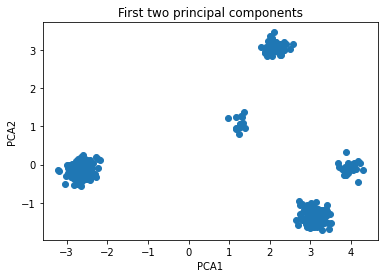

In [67]:
# start by importing the PCA class
from sklearn.decomposition import PCA

# 1. create and configure the model (call it "pca")
pca = PCA(n_components=10)

# 2. fit the model to the data (use pca.fit(...) )
pca.fit(X_df_scaled)

# 3. look at the model's explained_variance_ratio_ (i.e., pca.explained_variance_ratio_ where pca
#    is what you called the PCA object) to see how much variance the top two components capture.
var_ratio = pca.explained_variance_ratio_

print((var_ratio[0]*100), 'percent of the variance is explained by principal component 1')
print((var_ratio[1]*100), 'percent of the variance is explained by principal component 2')

# 4. transform the data to a new array
X_pca = pca.transform(X_df_scaled)

# 5. Plot the first two components, as we did in class.
plt.scatter( X_pca[:,0], X_pca[:,1] )
plt.title('First two principal components')
plt.xlabel('PCA1')
plt.ylabel('PCA2'); # add ; so notebook doesn't print the Text object returned by plt.ylabel


## Question 4 (15 points). Use the KMeans clustering algorithm from scikit-learn to assign each point in the dataset to a cluster. Configure KMeans to find a number of clusters equal to the number that you identified visually in the PCA plot from question 3. What are the sizes of the different clusters (how many points are in each cluster)? Remake the PCA scatter plot (PC1 versus PC2) colored by the cluster labels.

cluster sizes: 0    256
1    160
2     80
Name: clusters, dtype: int64


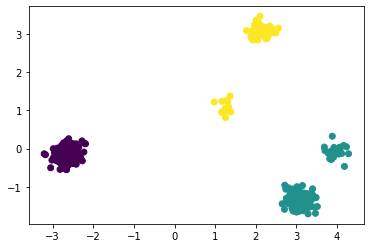

In [68]:
from sklearn.cluster import KMeans

nclust=3 # answer from Question 3

# 1. create a KMeans object, call it kmeans; you'll need to tell it how many clusters to find
kmeans = KMeans(n_clusters=3, random_state=10)

# 2. fit the object to the data using kmeans.fit
kmeans.fit(df)

# 3. Get the list of clusters using kmeans.predict
#    Name the returned array of cluster assignments "clusters"
clusters = kmeans.predict(df)

# To get the cluster sizes, first look at the array of clusters returned by kmeans.predict
#    to see that the different values are integers between 0 and nclust-1, inclusive.

df['clusters'] = clusters # create a new column in the dataframe with the KMeans cluster assignments

print('cluster sizes:', df['clusters'].value_counts()) # handy built-in counting method for Pandas Series objects

# use this code to remake the PCA plot colored by the kmeans clusters, where "clusters" is the 
#  array returned by the kmeans.predict function  
plt.scatter( X_pca[:,0], X_pca[:,1], c=clusters )



## Question 5. (10 points) Make a 'scatter matrix' plot showing each column of the original dataset plotted against each of the other 9 columns in a big 10x10 array (like we did for the iris dataset in the lectures10and11 notebook). Notice how the number of apparent clusters in the data varies depends on which pairs of features are being plotted against one another. Color the plots using the kmeans clusters like you did in the previous question.
You could use `pd.plotting.scatter_matrix` or try importing seaborn (`import seaborn as sns`) and use `sns.pairplot`. Or (optional) try both and see which looks nicer. `sns.pairplot` has a `hue` argument that you can use for coloring by passing `hue='clusters'`. See the `pd.plotting.scatter_matrix` and `sns.pairplot` examples in the lectures10and11.ipynb jupyter notebook.

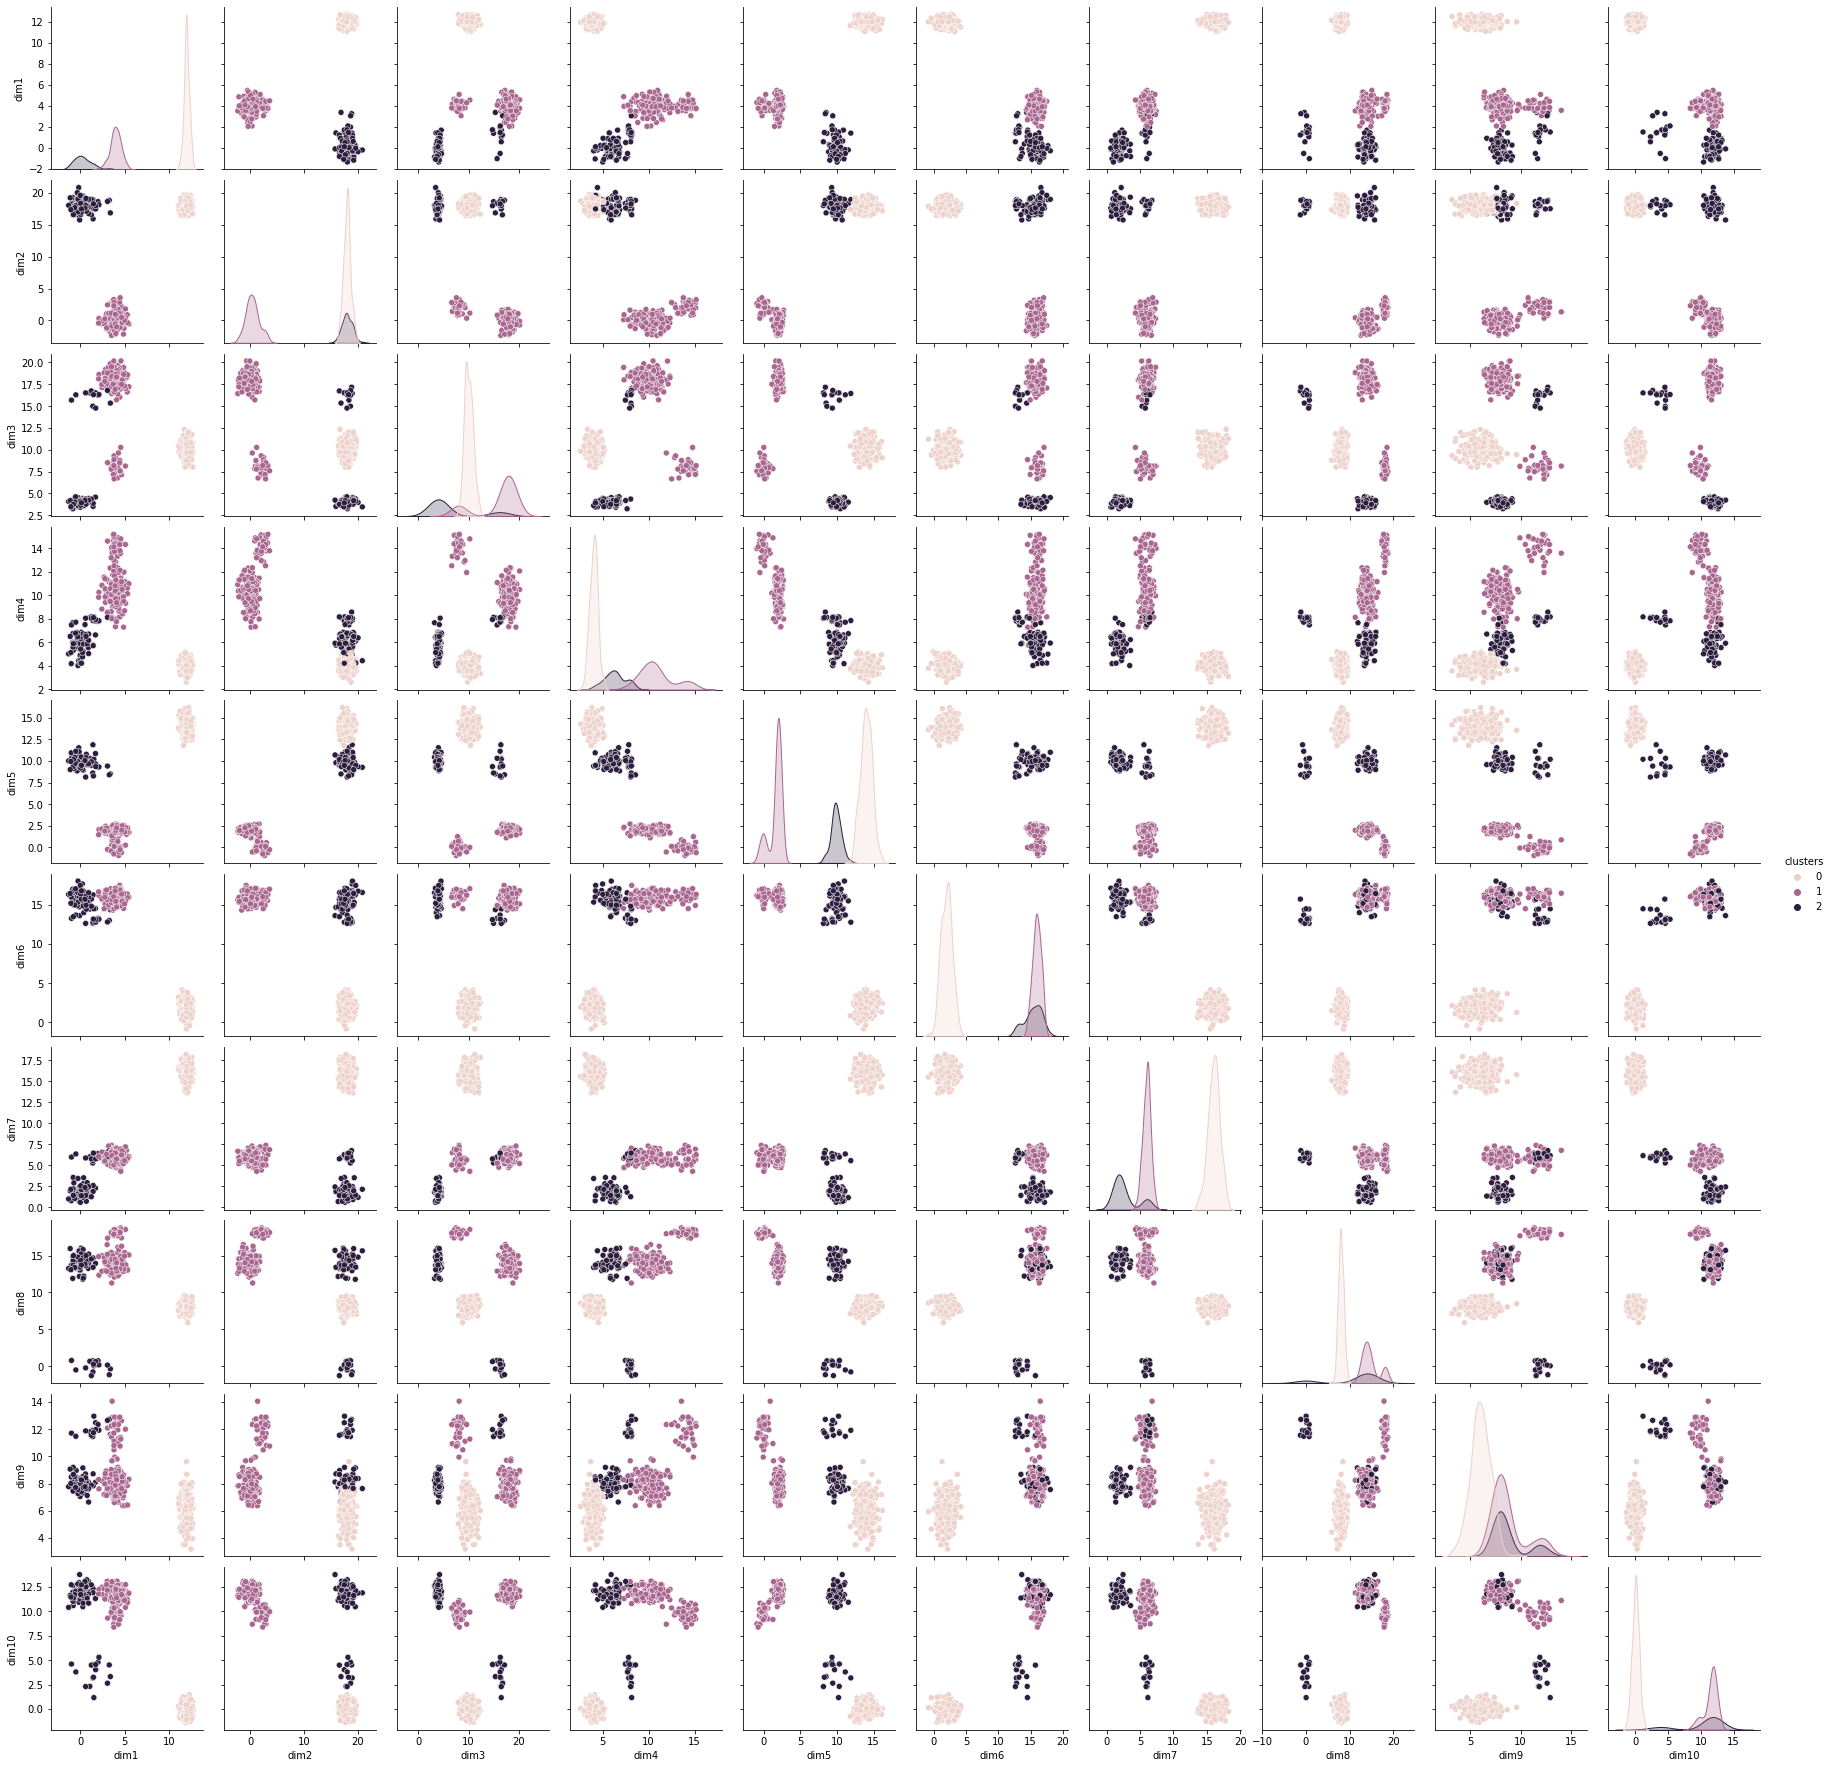

In [69]:
# import seaborn
import seaborn as sns

#plot, color by cluster id
sns.pairplot(df, hue='clusters')


array([[<AxesSubplot:xlabel='dim1', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim2', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim3', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim4', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim5', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim6', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim7', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim8', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim9', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim10', ylabel='dim1'>,
        <AxesSubplot:xlabel='clusters', ylabel='dim1'>],
       [<AxesSubplot:xlabel='dim1', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim2', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim3', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim4', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim5', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim6', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim7', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim8', ylabel='dim2'>,
      

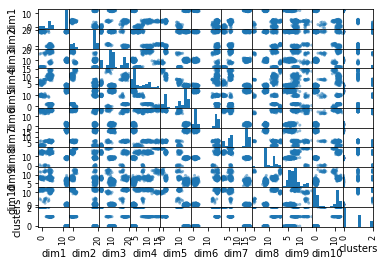

In [50]:
# trying other option

pd.plotting.scatter_matrix(df)
#this looks way worse! 


## Question 5. (5 points of extra credit) Use the TSNE algorithm in scikit-learn to project the dataset down into 2 dimensions. How many clusters do you see in the TSNE scatter plot?

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


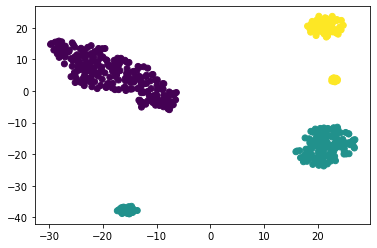

In [70]:
from sklearn.manifold import TSNE

# 1. create the TSNE object, call it tsne. Tell it you want 2 components (ie, a 2D projection) 
tsne = TSNE(n_components=2)

# 2. Fit the data to the model and transform to a new array (call it X_tsne) using tsne.fit_transform
#     This combines the fit and transform steps into a single operation.
X_tsne = tsne.fit_transform(X_df_scaled)

# Use this matplotlib command to make a scatter plot of the two components, colored by the 
#  kmeans cluster assignments
plt.scatter( X_tsne[:,0], X_tsne[:,1], c=clusters )


#remi notes:
#this is interesting, I see 4 (maybe 5) clusters by TSNE! the grey cluster is now completely split apart
